In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data.csv')

Data Collection & Processing

In [2]:
data.describe()

,ela,financeAmount,postcode,netSalary,loanTenure,interestRate,loanApplied
count,939.000000,939.000000,976.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,15959.531416,3532.694356,47655.150615,3457.413940,21.990000,17.997000,5581.600000
std,24027.757185,3351.043863,27143.513917,11434.249677,4.614021,0.094868,3255.973403
min,0.000000,0.000000,1000.000000,450.000000,6.000000,15.000000,1000.000000
25%,1000.000000,1000.000000,26092.500000,1990.442500,24.000000,18.000000,3000.000000
50%,11000.000000,2500.000000,43900.000000,2676.085000,24.000000,18.000000,5000.000000
75%,22000.000000,5000.000000,71800.000000,3700.000000,24.000000,18.000000,10000.000000
max,397000.000000,10000.000000,98000.000000,359313.000000,24.000000,18.000000,10000.000000


In [3]:
data.isnull().sum()

id                     0
ela                   61
financeAmount         61
address1               2
address2             138
address3             584
state                  0
city                   0
postcode              24
applicationStatus      0
netSalary              0
loanTenure             0
interestRate           0
loanApplied            0
jobTitle               0
loanReason             0
dtype: int64

In [4]:
data = data.dropna()

In [12]:
data.isnull().sum()

id                   0
ela                  0
financeAmount        0
address1             0
address2             0
address3             0
state                0
city                 0
postcode             0
applicationStatus    0
netSalary            0
loanTenure           0
interestRate         0
loanApplied          0
jobTitle             0
loanReason           0
dtype: int64

In [5]:
# Label encoding
data.replace({"applicationStatus":{'REJECTED':0, 'APPROVED':1}}, inplace=True)

<ipython-input-5-c86ea7a02e06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({"applicationStatus":{'REJECTED':0,'APPROVED':1}}, inplace = True)


Data Visualization

<Axes: xlabel='loanReason', ylabel='count'>

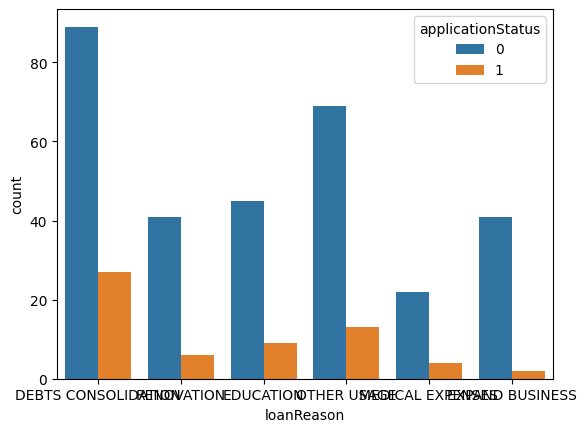

In [6]:
sns.countplot(x='loanReason',hue='applicationStatus',data=data)

In [7]:
# Convert categorical column to numerical values
data.replace({'loanReason':{'DEBTS CONSOLIDATION':0,'RENOVATION':1,'EDUCATION':2,'OTHER USAGE':3,'MEDICAL EXPENSES':4,'EXPAND BUSINESS':5}}, inplace = True)

In [8]:
# Separate features and target variable
X = data.drop(columns=['id', 'address1', 'address2', 'address3', 'state', 'city', 'postcode', 'jobTitle', 'applicationStatus'], axis=1)
y = data['applicationStatus']

Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

Training the model:

Random Forest Classifier Model

In [10]:
model =  RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [13]:
prediction = model.predict(X_test)

accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)
print("\n", classification_report(y_test, prediction))


Accuracy: 0.8783783783783784

               precision    recall  f1-score   support

           0       0.87      1.00      0.93        62
           1       1.00      0.25      0.40        12

    accuracy                           0.88        74
   macro avg       0.94      0.62      0.67        74
weighted avg       0.89      0.88      0.85        74

